In [105]:
import ipympl
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
import sounddevice as sd
from scipy.io import wavfile
%matplotlib inline

#Import Data and Normalize
fs, data = wavfile.read("../AudioFile/Beeps.wav")

if len(data.shape) > 1:
    data = data[:, 0]
data = data / max(abs(data))

In [106]:

window_size = int(fs / 40)
overlap_size = window_size // 2

window_func = np.hanning(window_size)

total_samples = len(data)

In [107]:
new_audio = np.zeros(total_samples + overlap_size)
output_index = 0
for begin in range(0, total_samples - window_size, overlap_size):
    end = begin + window_size
    window_square = data[begin:end]
    window = window_square * window_func
    window_freq = np.fft.rfft(window)

    padding = 50
    window_freq = np.concat([np.zeros(padding), window_freq])

    new_window = np.fft.irfft(window_freq)
    new_audio[output_index : output_index + window_size + padding*2] += new_window
    output_index += overlap_size
new_audio = new_audio[0: total_samples]

/tmp/ipykernel_10668/2141575778.py:11: RuntimeWarning: divide by zero encountered in log10
  10*np.log10(S_xx),  # Konvertering av spektrogrammatrise til logaritmisk skala


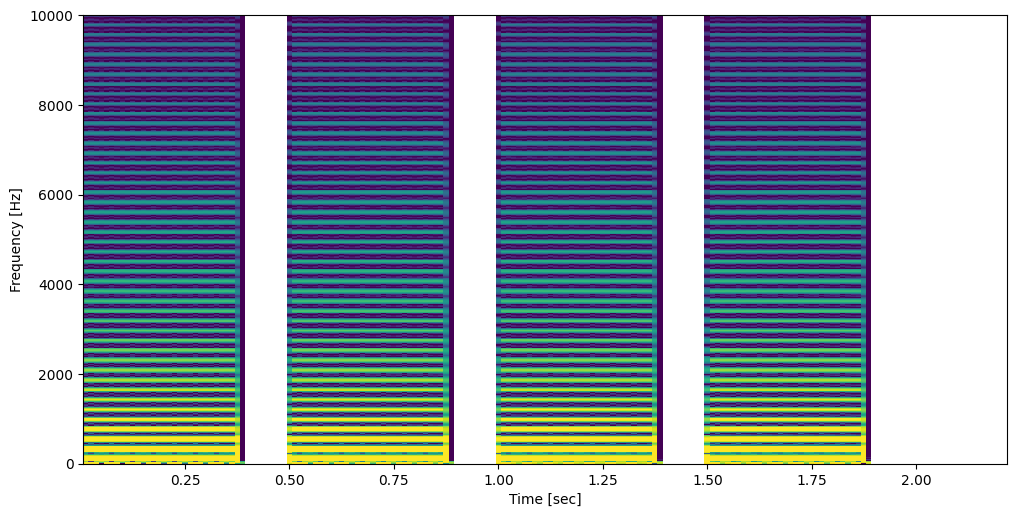

In [108]:
plt.close(1);plt.figure(1, figsize=(10,5))
f_axis, t_axis, S_xx = sig.spectrogram(data, 
                             fs, 
                             window = 'hann', 
                             nperseg = window_size,
                             noverlap = overlap_size,
                             nfft = 2*window_size
                            )
plt.pcolormesh(t_axis,            # Array med tidsstempel. Produsert av spectrogram()
               f_axis,            # Array med frekvenser. Produsert av spectrogram()
               10*np.log10(S_xx),  # Konvertering av spektrogrammatrise til logaritmisk skala
               vmax =-40,         # Høyeste dB-verdi på fargekartet
               vmin = -70,        # Laveste dB-verdi på fargekartet
               shading='auto'
               )
plt.ylim([0, 10000]) # Du kan justere på grensene i y-aksen dersom du vil inspisere en spesiell del av plottet
#plt.xlim([21.5, 23.5]) # Du kan justere på grensene i x-aksen dersom du vil inspisere en spesiell del av plottet
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.tight_layout(pad=0.1, w_pad=1.0, h_pad=1.0)
plt.show()

/tmp/ipykernel_10668/4160809035.py:11: RuntimeWarning: divide by zero encountered in log10
  10*np.log10(S_xx),  # Konvertering av spektrogrammatrise til logaritmisk skala


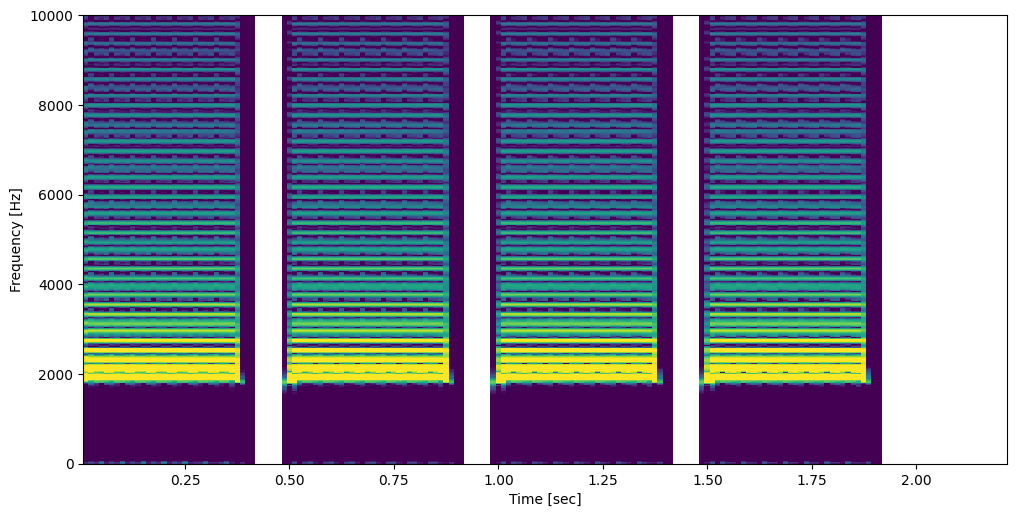

In [109]:
plt.close(2);plt.figure(2, figsize=(10,5))
f_axis, t_axis, S_xx = sig.spectrogram(new_audio, 
                             fs, 
                             window = 'hann', 
                             nperseg = window_size,
                             noverlap = overlap_size,
                             nfft = 2*window_size
                            )
plt.pcolormesh(t_axis,            # Array med tidsstempel. Produsert av spectrogram()
               f_axis,            # Array med frekvenser. Produsert av spectrogram()
               10*np.log10(S_xx),  # Konvertering av spektrogrammatrise til logaritmisk skala
               vmax =-40,         # Høyeste dB-verdi på fargekartet
               vmin = -70,        # Laveste dB-verdi på fargekartet
               shading='auto'
               )
plt.ylim([0, 10000]) # Du kan justere på grensene i y-aksen dersom du vil inspisere en spesiell del av plottet
#plt.xlim([21.5, 23.5]) # Du kan justere på grensene i x-aksen dersom du vil inspisere en spesiell del av plottet
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.tight_layout(pad=0.1, w_pad=1.0, h_pad=1.0)
plt.show()

In [110]:
#sd.play(data[start:total_samples], fs) # Play original audio

In [111]:
#sd.play(new_audio) # Play new audio

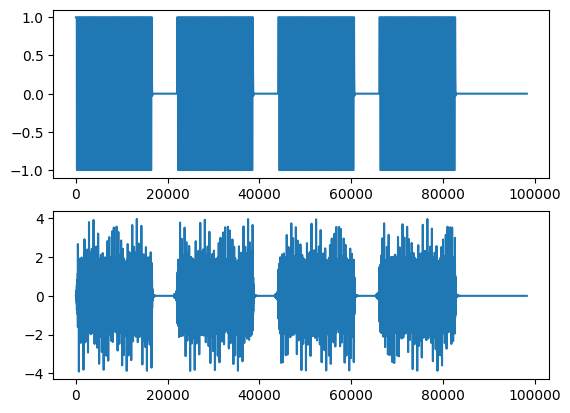

In [112]:
plt.close(3)
plt.figure(3)
plt.subplot(2, 1, 1)
plt.plot(data)
plt.subplot(2, 1, 2)
plt.plot(new_audio)
plt.show()